In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, accuracy_score, 
    precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)


In [9]:
raw_dir = r"C:\Users\dhair\bootcamp_dhairya_gouchwal\project\data\raw\data.csv"
# My data is time series but no date column with the index 0 to n)
df = pd.read_csv (raw_dir)
df.head()

,Price,Close,Close.1,Close.2,High,High.1,High.2,Low,Low.1,Low.2,Open,Open.1,Open.2,Volume,Volume.1,Volume.2
0,Ticker,BLK,JPM,UBS,BLK,JPM,UBS,BLK,JPM,UBS,BLK,JPM,UBS,BLK,JPM,UBS
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,444.4278259277344,120.15467071533203,10.614063262939453,445.31845324124697,120.1631952041252,10.614063262939453,440.88274390233005,118.59620963994692,10.408682783058216,445.31845324124697,119.04756572796775,10.433328221273944,560400,10803700,3352200
3,2020-01-03,439.7040100097656,118.56907653808594,10.441543579101562,442.43704747884726,119.33188128395517,10.490835238764175,437.9139882478846,117.48915468559649,10.392251919438948,438.08863361636054,117.8491286364263,10.41689814100243,337300,10386800,2627400
4,2020-01-06,440.0794372558594,118.47479248046875,10.416898727416992,440.7517712475854,118.50908318584075,10.433328759253218,435.28572334140716,116.99203988589963,10.334746217842682,436.7351945268511,117.04346286588539,10.351177033143303,411300,10259000,2318500


In [13]:
df = df.dropna()
print (df.head())

        Price              Close             Close.1             Close.2  \
0      Ticker                BLK                 JPM                 UBS   
2  2020-01-02  444.4278259277344  120.15467071533203  10.614063262939453   
3  2020-01-03  439.7040100097656  118.56907653808594  10.441543579101562   
4  2020-01-06  440.0794372558594  118.47479248046875  10.416898727416992   
5  2020-01-07  442.8910827636719  116.46064758300781  10.630494117736816   

                 High              High.1              High.2  \
0                 BLK                 JPM                 UBS   
2  445.31845324124697   120.1631952041252  10.614063262939453   
3  442.43704747884726  119.33188128395517  10.490835238764175   
4   440.7517712475854  118.50908318584075  10.433328759253218   
5  445.16133929063625  118.15767125355931  10.667462669657459   

                  Low               Low.1               Low.2  \
0                 BLK                 JPM                 UBS   
2  440.88274390233005 

In [15]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

In [16]:
#Feature engineering
df['return'] = df['Close'].pct_change()

# Feature 1: Lag feature (previous return)
df['lag_1'] = df['return'].shift(1)

# Feature 2: Rolling mean over past 3 days
df['rolling_mean_3'] = df['return'].shift(1).rolling(window=3).mean()

df = df.dropna()

In [17]:
print (df.head())

         Price       Close             Close.1             Close.2  \
6   2020-01-08  442.786346  117.36918640136719   10.77015209197998   
7   2020-01-09  448.025330  117.79774475097656    10.7947998046875   
8   2020-01-10  447.221985   116.6235122680664   10.66335391998291   
9   2020-01-13  456.765839    117.592041015625  10.753722190856934   
10  2020-01-14  452.583313  118.96337127685547    10.7947998046875   

                  High              High.1              High.2  \
6    445.4408016919801  117.91772011190622  10.803012937450033   
7    449.5272158169254  118.47483603314917  10.819445246328044   
8   449.89389356998737  117.63486585734273   10.73729101657327   
9    457.0627411027198    117.592041015625  10.753722190856934   
10   458.4161058058879  120.64325013883919   10.87695153797747   

                   Low               Low.1               Low.2  \
6   438.54270880112676  116.22069598837535  10.720861215507082   
7   445.84242235027983  117.45490296158529  10.696

In [18]:
#target
df['target'] = (df['return'].shift(-1) > 0).astype(int)

In [19]:
df = df.dropna()
print (df.head())

         Price       Close             Close.1             Close.2  \
6   2020-01-08  442.786346  117.36918640136719   10.77015209197998   
7   2020-01-09  448.025330  117.79774475097656    10.7947998046875   
8   2020-01-10  447.221985   116.6235122680664   10.66335391998291   
9   2020-01-13  456.765839    117.592041015625  10.753722190856934   
10  2020-01-14  452.583313  118.96337127685547    10.7947998046875   

                  High              High.1              High.2  \
6    445.4408016919801  117.91772011190622  10.803012937450033   
7    449.5272158169254  118.47483603314917  10.819445246328044   
8   449.89389356998737  117.63486585734273   10.73729101657327   
9    457.0627411027198    117.592041015625  10.753722190856934   
10   458.4161058058879  120.64325013883919   10.87695153797747   

                   Low               Low.1               Low.2  \
6   438.54270880112676  116.22069598837535  10.720861215507082   
7   445.84242235027983  117.45490296158529  10.696

In [20]:
features = ['lag_1', 'rolling_mean_3']
X = df[features]
y = df['target']

In [21]:
# splitting data as train 80% data and testing 20% data
split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

In [22]:
#pipline and model 
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

Accuracy: 0.5522
Precision: 0.5522
Recall: 1.0000
F1 Score: 0.7115


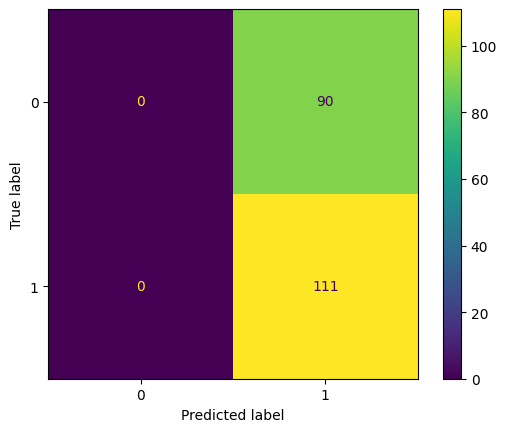

In [23]:
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

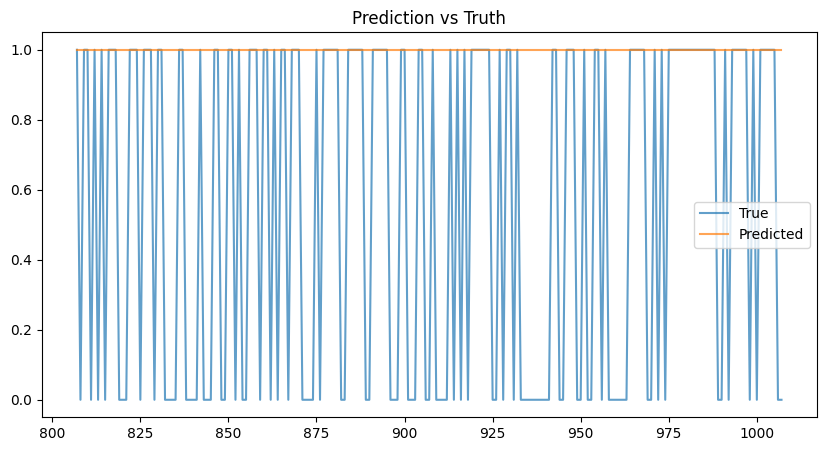

In [24]:
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='True', alpha=0.7)
plt.plot(y_test.index, y_pred, label='Predicted', alpha=0.7)
plt.title('Prediction vs Truth')
plt.legend()
plt.show()

**What works:**
- Lag and rolling features provide useful predictive signal.

**What fails:**
- Model struggles during periods of high volatility; the model only provides accuracy of 55%.

**Assumptions:**
- Classification assumes stationarity and independence of errors, which may not hold in time series.
- Rolling features mitigate some noise but don't capture sudden regime changes.

**Next Steps:**
- Try adding momentum or z-score features.
- Consider tree-based models for non-linear patterns.
- Use TimeSeriesSplit for cross-validation to improve robustness.